<h1>Tutorial</h1>



<h1>Introduction</h1>
<br/><br/>

In this tutorial, I would like to introduce data analysis, which is one of the most useful analysis tools that can provide a deep understanding about phenomena or problems around us as well as a popular public healthcare topic, smoking. The purpose of this tutorial is demonstrate how to analyze data with the entire data science pipeline, including data collection, data processing, exploratory data analysis and data visualization, providing analysis with hypothesis testing and machine learning, and finally insights and policy decisions with a message that the tutorial conveys. I will explain not only a technical guidance of installation and python programming, but also the societal benefits of using data analysis. I believe that data science can help to improve the level of healthcare provided to citizens. Understanding the major reasons and properties of health problems is critical to keep ourselves healthy. It is even better if data analysis can suggest a potential answer to solve health problems. I would like to discuss about smoking which is one of the most remarkable topics in public healthcare since cigarettes are easily accessible but obviously smoking is very harmful. This tutorial will focus on a way to promote to quitting smoking, especially its correlation with the costs of cigarettes in the U.S.
<br/><br/>




<h1>Installation and Prerequisites</h1>
<br/><br/>
The below websites will help you to understand this tutorial easily. The websites also teach how to install the frameworks and libraries necessary for this tutorials. Please visit the below websites to install and walk through them briefly before getting started.
<br/><br/>

Python Installation and Tutorials : <https://www.python.org/downloads/> <br/>
Numpy Installation : <https://docs.scipy.org/doc/numpy-1.10.1/user/install.html> <br/>
Pandas Installation and Tutorials :  <http://pandas.pydata.org/pandas-docs/stable/tutorials.html> <br/>
Sklearn Installation and tutorials : <http://scikit-learn.org/stable/install.html> <br/>
Matplotlib Installation and Tutorials : <https://matplotlib.org/api/pyplot_api.html> <br/>

<br/><br/>




<h1>Data Collection </h1>
<br/><br/>
The first step of entire data analysis process is data collection. There are many ways to collect data such as collecting through websites and different types of files like csv, json, and etc. Please download a csv data file from this websites (https://www.healthdata.gov/dataset/tax-burden-tobacco-volume-49-1970-2014). 
Open the file from the file location where you stored the file and read it with read_csv in pandas framework. Now create an initial data frame from the file. A brief look at the file is on the below.


<br/><br/>


In [5]:


import pandas as pd
import numpy as np
import csv

file = open('/home/cs/Downloads/tax_tobacco.csv')
initial_data = pd.read_csv(file)
initial_data.head()



,LocationAbbr,LocationDesc,Year,Datasource,TopicDesc,MeasureDesc,SubMeasureDesc,Data_Value,Data_Value_Unit,Data_Value_Type,GeoLocation,Source,TopicTypeId,TopicId,MeasureId,SubMeasureID,SubMeasureIdDisplayOrder
0,AL,Alabama,2014,OW,The Tax Burden on Tobacco,Cigarette Sales,Average Cost per pack,5.102000e+00,$,Dollars,"(32.84057112200048, -86.63186076199969)","Table 13- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,455CGS,1
1,AL,Alabama,2014,OW,The Tax Burden on Tobacco,Cigarette Sales,Cigarette Consumption (Pack Sales Per Capita),6.170000e+01,NaN,Pack,"(32.84057112200048, -86.63186076199969)","Table 11- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,453CGS,2
2,AL,Alabama,2014,OW,The Tax Burden on Tobacco,Cigarette Sales,Federal and State tax as a Percentage of Retai...,2.810000e+01,%,Percentage,"(32.84057112200048, -86.63186076199969)","Table 13- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,454CGS,3
3,AL,Alabama,2014,OW,The Tax Burden on Tobacco,Cigarette Sales,Federal and State Tax per pack,1.435000e+00,$,Dollars,"(32.84057112200048, -86.63186076199969)","Table 13- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,452CGS,4
4,AL,Alabama,2014,OW,The Tax Burden on Tobacco,Cigarette Sales,Gross Cigarette Tax Revenue,1.268532e+08,$,Dollars,"(32.84057112200048, -86.63186076199969)","Table 12- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,456CGS,5



<br/><br/>
The initial dataframe contains many columns with different information. Some of them may not be used, so we need to select columns that will be used for the future steps. We are going to look into a correlation between cigarette sales and cigarette prices over time, so I picked general information columns like 'LocationDesc' and 'Year' and then columns with cigarette sales and price. However, the initial dataframe does not contain columns that show price and sales of cigarettes only. They are included in 'SubMeasureDesc' and 'Data_Value' columns. At this moment, let's just take those columns out first and change them in the next step of data processing.  
<br/><br/>




<h1>Data Processing</h1>
<br/><br/>
We can convert the collected data from the previous step into a good shape before we start to analyze the data.
The above initialized data frame is not necessary for an additional tyding data process since it follows a proper tyding formation, so we can move on to the next step. (more information about tyding data is in here)
<http://www.jeannicholashould.com/tidy-data-in-python.html> <br/>
I created a new dataframe called 'data' with the useful columns for the later data analysis. Also, I prepared some dataframes based on their 'SubMeasureDesc' column values. You remember that I said I would just take 'SubMeasureDesc' and 'Data_Value' columns out and change them later. This is the time for changing the columns. The 'SubMeasureDesc' column actually includes descriptions of value types in the 'Data_Value' column, so we need to take note of when the column has certain string values. Since we need only cigarette sales and price from the column, we can just check if the 'SubMeasureDesc' column contains string values of 'Average Cost' and 'Consumption' and copy values from 'Data_Value' when it has the matching string values. Lastly, we need to make sure that there are no missing values. There are many ways to deal with missing values. Here I will just make sure to delete all missing values from the dataframe. Now we are ready to analyze data ! Let's move on to the next step !  
<br/><br/>


In [9]:


data = initial_data[['LocationDesc','Year' , 'SubMeasureDesc', 'Data_Value', 'GeoLocation']]
data=data.dropna()
avg_cost = data[data['SubMeasureDesc'].str.contains('Average Cost')]
avg_cost = avg_cost.dropna()
pack_sales = data[data['SubMeasureDesc'].str.contains('Consumption')]
pack_sales = pack_sales.dropna()

print(data.head())
print(avg_cost.head())
print(pack_sales.head())



  LocationDesc  Year                                     SubMeasureDesc  \
0      Alabama  2014                             Average Cost per pack    
1      Alabama  2014      Cigarette Consumption (Pack Sales Per Capita)   
2      Alabama  2014  Federal and State tax as a Percentage of Retai...   
3      Alabama  2014                    Federal and State Tax per pack    
4      Alabama  2014                       Gross Cigarette Tax Revenue    

     Data_Value                              GeoLocation  
0  5.102000e+00  (32.84057112200048, -86.63186076199969)  
1  6.170000e+01  (32.84057112200048, -86.63186076199969)  
2  2.810000e+01  (32.84057112200048, -86.63186076199969)  
3  1.435000e+00  (32.84057112200048, -86.63186076199969)  
4  1.268532e+08  (32.84057112200048, -86.63186076199969)  
   LocationDesc  Year          SubMeasureDesc  Data_Value  \
0       Alabama  2014  Average Cost per pack        5.102   
6        Alaska  2014  Average Cost per pack        8.901   
12      Ariz



<h1>Exploratory Data Analysis and Data Visualization</h1>
<br/><br/>
In this step, we will use exploratory data analysis and data visualization to help readers understand data at a glance. In exploratory data analysis, it is important to understand the central tendency of data, so we will calculate the mean values of each year. However, it is not enough to simply get mean values from the data because there are multiple same year values in the column. I used 'groupby' function to assign mean values to the rows with multiple identical year values as well. Also we need to import matplotlib.pyplot at the top in preparation for plotting graphs.
<br/><br/>


In [10]:


import matplotlib.pyplot as plt

avg_cost_mean = avg_cost.groupby(['Year']).mean()
avg_cost_years = np.unique(avg_cost['Year'].values)

pack_sales_mean = pack_sales.groupby(['Year']).mean()
pack_sales_years = np.unique(pack_sales['Year'].values)



<br/><br/>

Now, let's start to plot graphs. There are many ways to plot graphs, but here I will use matplotlib library. A subplots function will generate a figure and axis properties. We can use an axis value to set a label of axis, title, and values of plotting. Let's do the plot with the 'show' function and see how they look. The first graph of 'Average Cigarette Price per Pack in the U.S. between 1970 - 2014' shows that the average cigarette price in the U.S. has been gradually increased over time between 1970 and 2014. The second graph of 'Cigarette Sales in the U.S. between 1970 - 2014' tends to decrease over time and it has an approximately inverse relationship with the average cigarette price per pack. The third graph shows that the correlation between a mean of cigarette price and a mean of cigarette sales is negative. As the mean of cigarette price goes up, the mean of cigarette sales decreases, and vice and versa.

<br/><br/>

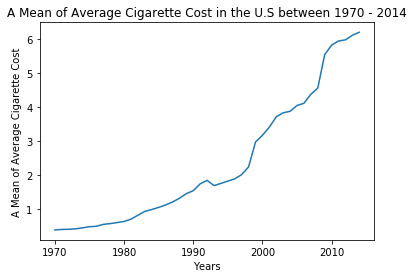

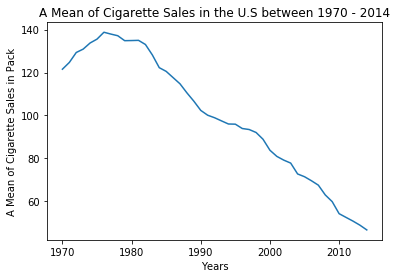

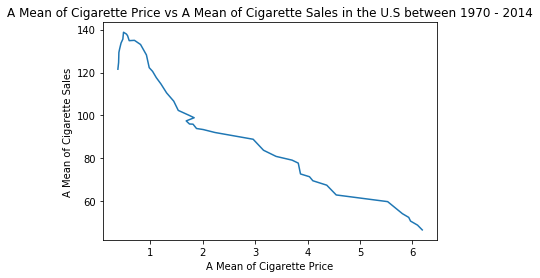

In [11]:


fig, ax = plt.subplots()
ax.set_xlabel('Years')
ax.set_ylabel('A Mean of Average Cigarette Cost')
ax.set_title('A Mean of Average Cigarette Cost in the U.S between 1970 - 2014')
ax.plot(avg_cost_years, avg_cost_mean)
plt.show()

fig, ax = plt.subplots()
ax.set_xlabel('Years')
ax.set_ylabel('A Mean of Cigarette Sales in Pack')
ax.set_title('A Mean of Cigarette Sales in the U.S between 1970 - 2014')
ax.plot(pack_sales_years, pack_sales_mean)
plt.show()

fig, ax = plt.subplots()
ax.set_xlabel('A Mean of Cigarette Price')
ax.set_ylabel('A Mean of Cigarette Sales')
ax.set_title('A Mean of Cigarette Price vs A Mean of Cigarette Sales in the U.S between 1970 - 2014')
ax.plot(avg_cost_mean, pack_sales_mean)
plt.show()



<br/><br/>

I am going to use visualization tool 'ggplot' to show the proportion of tax in a cigarette price with violin plot. Below distribution is the distribution of tax percentage in the U.S. between 1970 and 2014.

<br/><br/>

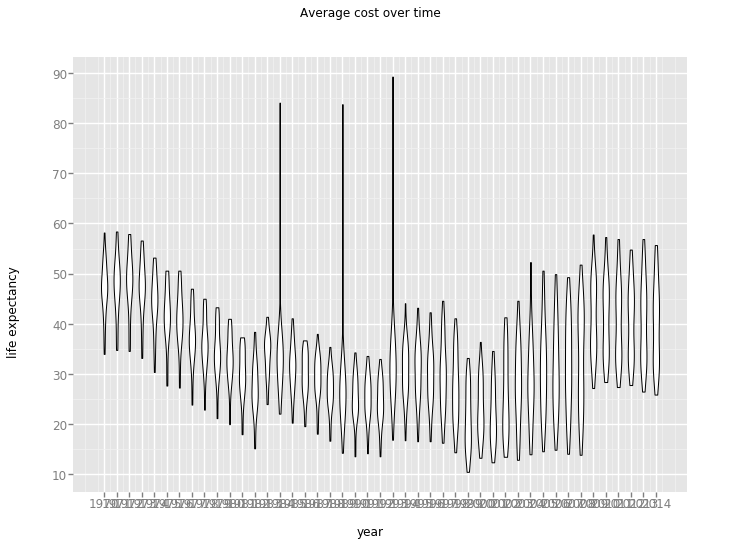

<ggplot: (-894277774)>

In [26]:


from ggplot import *

tax_percentage = data[data['SubMeasureDesc'].str.contains('Percentage')]
ggplot(aes(x='Year', y='Data_Value'), data=tax_percentage) +\
    geom_violin() +\
    labs(title="Proportion of Tax in Cigarette Price over Time",
         x = "Year",
         y = "Tax Percentage of Whole Price")

    


<h3>Data Transformations</h3>
<br/><br/>
According to the graphs from the previous process, I can tell that there is a correlation between price and sales of cigarettes in the U.S. At this point, we need to think about the validity of data. If the price and sales values from the graphs change over time naturally, do you think the result is distorted? Because of that reason, we need to transform the values into a unitless scale with standardization. Here we have to do some data processing parts again, similarly to the processing done at the beginning of the analysis.     
<br/><br/>

In [12]:

avg_cost = data[data['SubMeasureDesc'].str.contains('Average Cost')]

avg_cost_std = avg_cost.groupby(['Year']).std()
avg_cost_years = np.unique(avg_cost['Year'].values)
pack_sales_std = pack_sales.groupby(['Year']).std()
pack_sales_years = np.unique(pack_sales['Year'].values)

avg_cost_mean = avg_cost_mean.rename(columns={'Data_Value' : 'Mean'})
avg_cost_std= avg_cost_std.rename(columns={'Data_Value' : 'STD'})

avg_cost_mean['Year'] = avg_cost_years
avg_cost_std['Year'] = avg_cost_years

avg_cost_mean_std = avg_cost_mean.merge(avg_cost_std, how='left')
avg_cost = avg_cost.merge(avg_cost_mean_std, how = 'left' )



<br/><br/>
After the data processing part, we need to calculate standardized cost. From the previous graph, a price is the only value necessary for satandardization, because a price changes over time by inflation. We cannot compare the price values in different years by the numbers because price values in 1970 and 2014 are different, so we cannot put them into one plot all together. That's why we need a unitless and proportional scale. Here is a formula to get the standardized cost. <br/>

$z = \frac{\bar{x} - x}{sd(x)}$


Now let's look at the new plots with standardized cost. The first plot is standardized average prices by years. It seems well standardized since it has a flat linear regression line across the average price. Now we can see the unskewed correlation plot. The plot of standardized average cigarette prices and cigarette sales in the U.S. shows that there is still a similar  correlation between the two. According to the linear regression line, the cigarette consumption tends to go down when the price values increase and vice versa. Here I draw a linear regression line to show roughly how the results look like. I used first degree polynomial and 10th degree polynomial to compare how they are different by using polyfit and poly1d functions. 
<br/><br/>

  LocationDesc  Year          SubMeasureDesc  Data_Value  \
0      Alabama  2014  Average Cost per pack        5.102   
1       Alaska  2014  Average Cost per pack        8.901   
2      Arizona  2014  Average Cost per pack        6.752   
3     Arkansas  2014  Average Cost per pack        5.508   
4   California  2014  Average Cost per pack        5.475   

                                 GeoLocation      Mean       STD  standard  
0    (32.84057112200048, -86.63186076199969)  6.189294  1.331714 -0.816462  
1   (64.84507995700051, -147.72205903599973)  6.189294  1.331714  2.036252  
2  (34.865970280000454, -111.76381127699972)  6.189294  1.331714  0.422543  
3    (34.74865012400045, -92.27449074299966)  6.189294  1.331714 -0.511592  
4   (37.63864012300047, -120.99999953799971)  6.189294  1.331714 -0.536372  


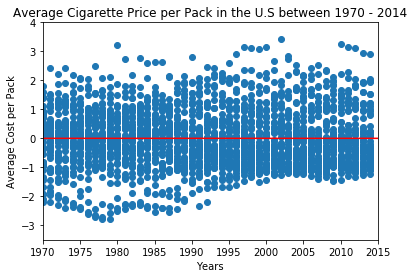

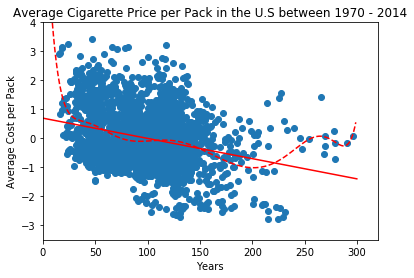

In [29]:


avg_cost['standard'] = (avg_cost['Data_Value']-avg_cost['Mean'])/avg_cost['STD']
avg_cost_standard = avg_cost['standard'].mean()
print(avg_cost.head())

fig, ax = plt.subplots()
ax.set_xlabel('Years')
ax.set_ylabel('Average Cost per Pack')
ax.set_xlim(1970,2015)
ax.set_ylim(-3.5,4)
ax.set_title('Average Cigarette Price per Pack in the U.S between 1970 - 2014')
ax.scatter(avg_cost['Year'], avg_cost['standard'])
z = np.polyfit(avg_cost['Year'], avg_cost['standard'], 1)
p=np.poly1d(z)
xp = np.linspace(1970,2015,2015)
ax = plt.plot(xp, p(xp), '-',  color='red')
plt.show()

fig, ax = plt.subplots()
ax.set_xlabel('Years')
ax.set_ylabel('Average Cost per Pack')
ax.set_xlim(0,320)
ax.set_ylim(-3.5,4)
ax.set_title('Average Cigarette Price per Pack in the U.S between 1970 - 2014')
ax.scatter(pack_sales['Data_Value'] ,  avg_cost['standard'])
z = np.polyfit(pack_sales['Data_Value'] ,  avg_cost['standard'], 1)
p=np.poly1d(z)
p10 = np.poly1d(np.polyfit(pack_sales['Data_Value'] ,  avg_cost['standard'] , 10))
xp = np.linspace(0,300,300)
ax = plt.plot(xp, p(xp), '-', p10(xp), '--', color='red')
plt.show()





<h3>Sales Trend by Location</h3>

<br/><br/>
At this point, I need to check if the data analysis is different based on location in order to prove that the result is not dependent on a location, because a location could be what determines the amount of cigarette consumption the most. I will make different groups of regions, compare the data and see if they have similar trends on price vs sales. The first group deals with city and rural areas to compare the distribution in higher populated areas versus country sides. Here I made 'location_dataframe' function to do the data processing part faster and more effectively. The function will take the name of states and return dataframes after putting the input states.
<br/><br/>


In [14]:


def location_dataframe(a,b,c,d,e,f,g):
    
    city_df = avg_cost[avg_cost['LocationDesc'].str.contains(a)]
    city_df = city_df.append(avg_cost[avg_cost['LocationDesc'].str.contains(b)])
    city_df = city_df.append(avg_cost[avg_cost['LocationDesc'].str.contains(c)])
    city_df = city_df.append(avg_cost[avg_cost['LocationDesc'].str.contains(d)])
    city_df = city_df.append(avg_cost[avg_cost['LocationDesc'].str.contains(e)])
    city_df = city_df.append(avg_cost[avg_cost['LocationDesc'].str.contains(f)])
    city_df = city_df.append(avg_cost[avg_cost['LocationDesc'].str.contains(g)])
    city_sales = pack_sales[pack_sales['LocationDesc'].str.contains(a)]
    city_sales = city_sales.append(pack_sales[pack_sales['LocationDesc'].str.contains(b)])
    city_sales = city_sales.append(pack_sales[pack_sales['LocationDesc'].str.contains(c)])
    city_sales = city_sales.append(pack_sales[pack_sales['LocationDesc'].str.contains(d)])
    city_sales = city_sales.append(pack_sales[pack_sales['LocationDesc'].str.contains(e)])
    city_sales = city_sales.append(pack_sales[pack_sales['LocationDesc'].str.contains(f)])
    city_sales = city_sales.append(pack_sales[pack_sales['LocationDesc'].str.contains(g)])

    return city_df , city_sales



<br/><br/>
We also need 'location_plot' function to plot the multiple pairs of dataframes. This will take two dataframes and a comment string and return a graph plot with a linear regression model. Now let's look at the results. Both city and rural areas have a similar plot of the overall plot with a negative correlation. However, the higher populated areas tend to have more extreme values on the top left and bottom right side than the lower populated areas. I expect that this is because the higher populated areas have a bigger sample size so that this provides more distinct differences on the cigarette consumers' behavior. 
<br/><br/>
After the comparison of city and rural areas, I performed additional tests on four different regions. Overall, they have an inverse tendency in 1 dimensional polyfitting, except southern states. I found out that this is because the cigarette consumers in Florida are not sensitive to the price. I expect that this is because there are lots of tourists visiting the state and many retirees live in the state. Typically, tourists and retirees are not sensitive to the price of cigarettes than other types of consumers. The southern area shows a slight decreasing plot like other three samples without Florida. Also, the consumers in the east side are most sensitive to the price of cigarettes. It is surprising that most tested areas showed inverse correlations between cigarette prices and sales. Also, it is interesting that we can see the different reactions from consumers on the changes of price based on the location.
<br/><br/>

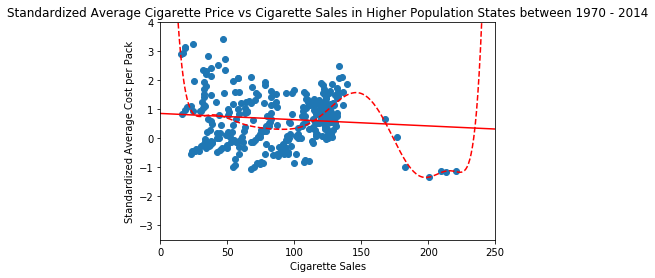

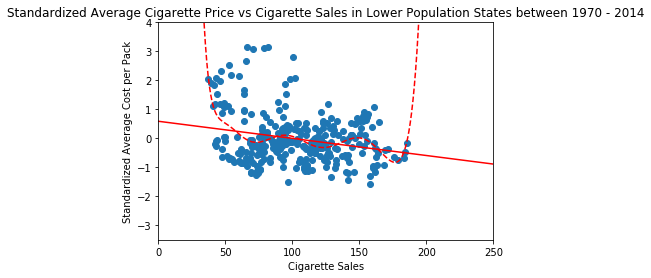

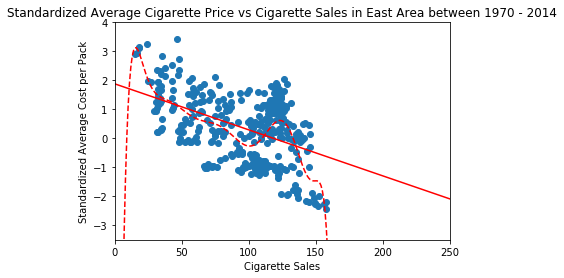

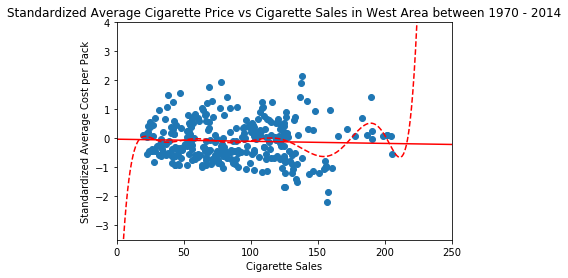

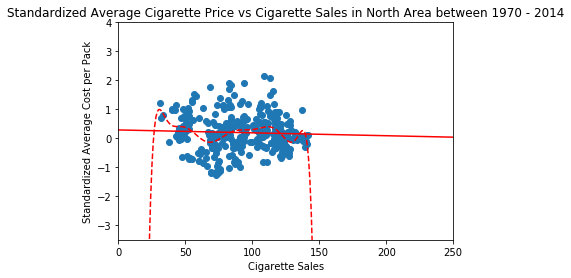

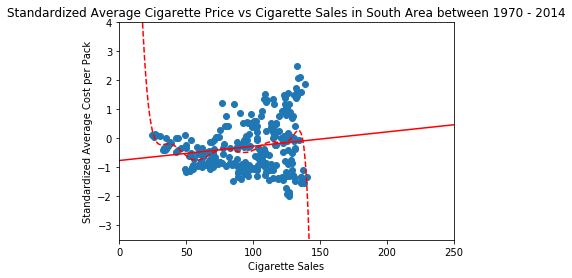

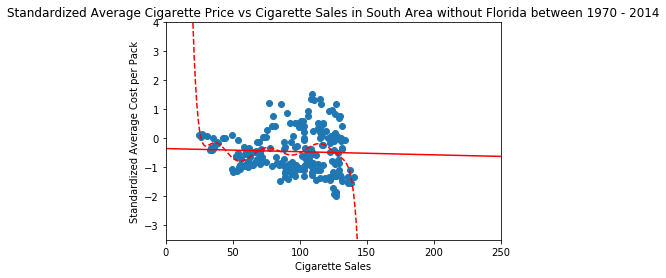

In [15]:


city_df, city_sales = location_dataframe('California', 'New York', 'Florida','Texas','Pennsylvania','District of Columbia','New Jersey')
rural_df, rural_sales = location_dataframe('Wyoming','Vermont','Nebraska', 'Alaska','North Dakota','South Dakota','Delaware')

east_df, east_sales = location_dataframe('Maryland', 'Virginia','New York', 'Massachusetts','Maine','New Jersey' ,'Pennsylvania')
west_df, west_sales = location_dataframe('California','Oregon', 'Arizona', 'Nevada', 'Utah','Idaho','Colorado')
north_df, north_sales = location_dataframe('Montana','North Dakota','Minnesota','Michigan', 'Illinois','Nebraska','Wisconsin')
south_df, south_sales = location_dataframe('Florida', 'Georgia', ' Alabama' , 'Mississippi','Texas','New Mexico', 'South Carolina')
south_df1, south_sales1 = location_dataframe('Tenessee', 'Georgia', ' Alabama' , 'Mississippi','Texas','New Mexico', 'South Carolina')



def location_plot(x,y,z):

    fig, ax = plt.subplots()

    ax.set_xlabel('Cigarette Sales')
    ax.set_ylabel('Standardized Average Cost per Pack')
    ax.set_xlim(0,250)
    ax.set_ylim(-3.5,4)
    ax.set_title('Standardized Average Cigarette Price vs Cigarette Sales in ' +z+' between 1970 - 2014')
    ax.scatter( x , y )

    z = np.polyfit(x ,   y, 1)
    p=np.poly1d(z)
    p10 = np.poly1d(np.polyfit(x , y , 10))
    xp = np.linspace(0,300,300)

    ax = plt.plot(xp, p(xp), '-', p10(xp), '--', color='red')

    plt.show()


location_plot(city_sales['Data_Value'] ,city_df['standard'],'Higher Population States')
location_plot(rural_sales['Data_Value'], rural_df['standard'], 'Lower Population States' )

location_plot(east_sales['Data_Value'], east_df['standard'], 'East Area')
location_plot(west_sales['Data_Value'], west_df['standard'], 'West Area')
location_plot(north_sales['Data_Value'], north_df['standard'], 'North Area')
location_plot(south_sales['Data_Value'], south_df['standard'], 'South Area')
location_plot(south_sales1['Data_Value'], south_df1['standard'], 'South Area without Florida')  





<h1>Hypothesis Test and Machine Learning</h1><br/><br/>
In machine learning, hypothesis function is a candidate and most likely true formula y = h(x) in a machine learning algorithm and we put training data(historical records) (x,y) sets into the algorithm. The algorithm will return a new example x in y = h(x) from a prediction phase. A null hypothesis of the hypothesis question is that there is no correlation between cigarette price and sales. According to the result, the test rejects the null hypothesis( a correlation of price and sales = 0 ) since the p-value is less than significance alpha 0.05.(I put a code and result on the next step).
<br/>
<br/>
Here I will use built-in machine learning functions from sklearn library to execute the machine learning tests. Before we jump into the tests, we have to import modules from sklearn. Please make sure that you imported all correctly before you go further. Since the tests will not accept float values, we need to convert the float values into int values and reshape the format of the dataframe. By using a cross_validation function, we can split test and training sets for each variable before we run the test. Use classifier function in sklearn and fit the train sets. A score function returns the coefficient of determination $R^2$ which tells the extent of the correlation. I tested with KNN, SVC, and Logistic Regression. Every test gives around 0.7 ~ 0.8 of accuracy of the test and SVC is slightly more effective than the others.
<br/><br/>


In [105]:


from sklearn import neighbors, preprocessing, cross_validation, svm, datasets
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

pack_sales['Data_Value']= pack_sales['Data_Value'].dropna()
avg_cost['standard'] = avg_cost['standard'].dropna()
sales_list = np.reshape(pack_sales['Data_Value'].values,(len(pack_sales['Data_Value']),1)).astype(int)
cost_list = np.reshape(avg_cost['standard'].values,(len(avg_cost['standard']),1)).astype(int)

x_train, x_test, y_train, y_test = cross_validation.train_test_split( sales_list, cost_list, test_size=0.5)
knn_sample= neighbors.KNeighborsClassifier()
knn_sample = knn_sample.fit(x_train, y_train)
acc = knn_sample.score(x_train, y_train)
print("KNN = ", acc)
y_predict =  knn_sample.predict(x_test)
print(y_predict)

svc = svm.SVC(kernel= 'linear', C=1.0)
svc_sample = svc.fit(x_train, y_train)
acc1 = svc_sample.score(x_train,y_train)
print("SVC = " ,  acc1)
y_predict =  svc_sample.predict(x_test)
print(y_predict)

logreg_sample = LogisticRegression()
logreg_sample = RFE(logreg_sample,200)
logreg_sample = logreg_sample.fit(x_train, y_train)
acc2 = logreg_sample.score(x_train, y_train)
print("Logistic Regression = ", acc2)
y_predict =  logreg_sample.predict(x_test)
print(y_predict)



/home/cs/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cs/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNN =  0.703574542284
[1 0 0 ..., 0 3 0]
SVC =  0.717523975588
[0 0 0 ..., 0 0 0]
Logistic Regression =  0.717523975588
[0 0 0 ..., 0 0 0]



<br/><br/>

This statistic test provides regression results which include the p-value. We have a p-value of 0.022 on the original price and sales data. This means that the null hypothesis( a correlation between price and sales = 0 ) is rejected since the p-value is less than significance alpha 0.05. 

<br/>
<br/>


In [102]:


import statsmodels.api as sm

ols_sample = sm.OLS(sales_list,cost_list).fit()
ols_sample.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.274
Date:                Thu, 18 May 2017   Prob (F-statistic):             0.0217
Time:                        02:32:22   Log-Likelihood:                -13974.
No. Observations:                2295   AIC:                         2.795e+04
Df Residuals:                    2294   BIC:                         2.796e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -7.3851      3.216     -2.296      0.022     -13.691      -1.079
==============================================================================
Omnibus:                      218.107   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.305
Skew:                           0.619   Prob(JB):                     3.64e-94
Kurtosis:                       4.723   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



<br/>
<h1> Insight and Policy Decision </h1>
<br/><br/>
Finally, we are in the process of making a conclusion on the entire data analysis process. We have tried multiple different input values with a given hypothesis function to find an optimized function. Now, we can determine whether our hypothesis is right or wrong with the best test results. According to the linear regression and machine learning test, we can conclude that the mean price of cigarettes and the mean sales of cigarettes have a negative correlation. However, we cannot say that they are in a causation relationship since a correlation has nothing to do with a causation. Even though we cannot tell one causes the other, the result of the analysis is valuable because it could give a hint of ways to control cigarette sales. Do not get disappointed yet. We only focused on smokers' reactions to the price changes in this tutorial. If we collect and look into more data sets with many different features, we could get closer to the answer of reducing smoking and I believe that there are many ways to reduce smoking, not just this one.  
<br/>



<h1>Summary and References</h1>
<br/><br/>
More information and data will be available on the below websites.
<br/><br/>
Healthdata : <https://www.healthdata.gov/dataset/tax-burden-tobacco-volume-49-1970-2014> <br/>
U.S.Government's Open Data : <https://www.data.gov/> <br/>
Tobaccofreekids: <http://www.tobaccofreekids.org/facts_issues/fact_sheets/policies/tax/us_state_local/.> <br/>
Tyding Data : <http://www.jeannicholashould.com/tidy-data-in-python.html> <br/>
Kaggle : <https://www.kaggle.com/>  <br/>
KDNuggets : <http://www.kdnuggets.com/> <br/>
<br/><br/>